In [1]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np

def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encode_sequences(x_train)
x_test = one_hot_encode_sequences(x_test)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [3]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [5]:
import datetime

start_at = datetime.datetime.now()
print('Decision Tree Classifier')
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(partial_x_train, partial_y_train)
print('Time taken: %s' % str(datetime.datetime.now() - start_at))
print('Accuracy % s: ' % dtc.score(x_val, y_val)) # 0.70599999999999996

start_at = datetime.datetime.now()
print('Gaussian Naive Bayes Classifier')
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(partial_x_train, partial_y_train)
print('Time taken: %s' % str(datetime.datetime.now() - start_at))
print('Accuracy % s: ' % nb.score(x_val, y_val)) # 0.72760000000000002

start_at = datetime.datetime.now()
print('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(partial_x_train, partial_y_train)
print('Time taken: %s' % str(datetime.datetime.now() - start_at))
print('Accuracy % s: ' % rfc.score(x_val, y_val)) # 0.75729999999999997

Decision Tree Classifier
Time taken: 0:01:31.850625
Accuracy 0.706: 
Gaussian Naive Bayes Classifier
Time taken: 0:00:02.236901
Accuracy 0.7276: 
Random Forest Classifier
Time taken: 0:00:05.588991
Accuracy 0.7573: 


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

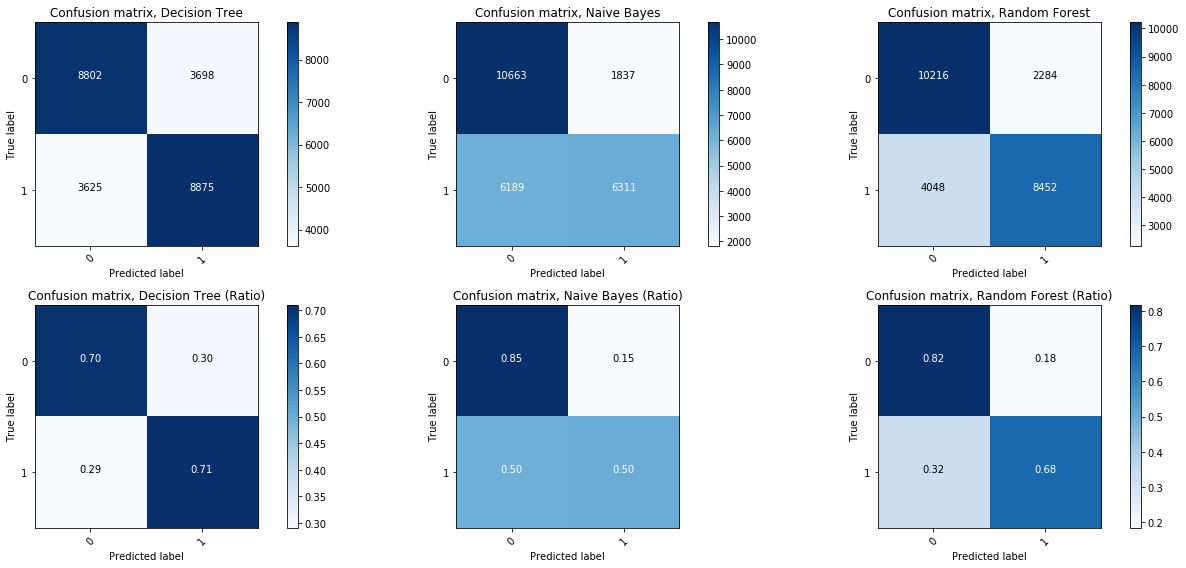

In [12]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, dtc.predict(x_test))
cm_nb = confusion_matrix(y_test, nb.predict(x_test))
cm_rfc = confusion_matrix(y_test, rfc.predict(x_test))

plt.figure(figsize=(20,8))
plt.subplot('231')
plot_confusion_matrix(cm_dtc, [0, 1], title='Confusion matrix, Decision Tree')
plt.subplot('232')
plot_confusion_matrix(cm_nb, [0, 1], title='Confusion matrix, Naive Bayes')
plt.subplot('233')
plot_confusion_matrix(cm_rfc, [0, 1], title='Confusion matrix, Random Forest')
plt.subplot('234')
plot_confusion_matrix(cm_dtc, [0, 1], normalize=True, title='Confusion matrix, Decision Tree (Ratio)')
plt.subplot('235')
plot_confusion_matrix(cm_nb, [0, 1], normalize=True, title='Confusion matrix, Naive Bayes (Ratio)')
plt.subplot('236')
plot_confusion_matrix(cm_rfc, [0, 1], normalize=True, title='Confusion matrix, Random Forest (Ratio)')